In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_column', 1000)
pd.set_option('max_colwidth', 200)
pd.set_option('max_info_rows', 1000)

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission.csv')

In [3]:
print(train.shape)
print(test.shape)

(30557, 82)
(16136, 77)


In [4]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [6]:
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [7]:
train['day'] = train['Date'].dt.day
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year
train['dayofweek'] = train['Date'].dt.dayofweek
train['dayofyear'] = train['Date'].dt.dayofyear
train['is_week_end']=train['dayofweek'].map(lambda x:1 if x in [5,6] else 0)

test['day'] = test['Date'].dt.day
test['month'] = test['Date'].dt.month
test['year'] = test['Date'].dt.year
test['dayofweek'] = test['Date'].dt.dayofweek
test['dayofyear'] = test['Date'].dt.dayofyear
test['is_week_end']=test['dayofweek'].map(lambda x:1 if x in [5,6] else 0)

In [8]:
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,day,month,year,dayofweek,dayofyear,is_week_end
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,76.536426,38.593017,-61.752587,22.363665,-999.000000,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,2,1,2020,3,2,0
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486

In [9]:
train['l3_NO2_densities'] = train['L3_NO2_NO2_column_number_density']+train['L3_NO2_NO2_slant_column_number_density']+train['L3_NO2_stratospheric_NO2_column_number_density']+train['L3_NO2_tropospheric_NO2_column_number_density']
train['l3_HCHO_densities'] = train['L3_HCHO_HCHO_slant_column_number_density'] + train['L3_HCHO_tropospheric_HCHO_column_number_density'] + train['L3_HCHO_tropospheric_HCHO_column_number_density']

In [10]:
test['l3_NO2_densities'] = test['L3_NO2_NO2_column_number_density']+test['L3_NO2_NO2_slant_column_number_density']+test['L3_NO2_stratospheric_NO2_column_number_density']+test['L3_NO2_tropospheric_NO2_column_number_density']
test['l3_HCHO_densities'] = test['L3_HCHO_HCHO_slant_column_number_density'] + test['L3_HCHO_tropospheric_HCHO_column_number_density'] + test['L3_HCHO_tropospheric_HCHO_column_number_density']

In [17]:
var_rel_hum_2m = train.groupby('Place_ID').var()['relative_humidity_2m_above_ground']
train['var_rel_hum_2m'] = train.Place_ID.map(var_rel_hum_2m.to_dict())

max_rel_hum_2m = train.groupby('Place_ID').max()['relative_humidity_2m_above_ground']
train['max_rel_hum_2m'] = train.Place_ID.map(max_rel_hum_2m.to_dict())

std_rel_hum_2m = train.groupby('Place_ID').std()['relative_humidity_2m_above_ground']
train['std_rel_hum_2m'] = train.Place_ID.map(std_rel_hum_2m.to_dict())

mean_rel_hum_2m = train.groupby('Place_ID').mean()['relative_humidity_2m_above_ground']
train['mean_rel_hum_2m'] = train.Place_ID.map(mean_rel_hum_2m.to_dict())


In [18]:
var_rel_hum_2m = test.groupby('Place_ID').var()['relative_humidity_2m_above_ground']
test['var_rel_hum_2m'] = test.Place_ID.map(var_rel_hum_2m.to_dict())

max_rel_hum_2m = test.groupby('Place_ID').max()['relative_humidity_2m_above_ground']
test['max_rel_hum_2m'] = test.Place_ID.map(max_rel_hum_2m.to_dict())

std_rel_hum_2m = test.groupby('Place_ID').std()['relative_humidity_2m_above_ground']
test['std_rel_hum_2m'] = test.Place_ID.map(std_rel_hum_2m.to_dict())

mean_rel_hum_2m = test.groupby('Place_ID').mean()['relative_humidity_2m_above_ground']
test['mean_rel_hum_2m'] = test.Place_ID.map(mean_rel_hum_2m.to_dict())


In [19]:
train.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
train['L3_NO2_NO2_column_number_density','L3_O3_O3_column_number_density',
      'L3_CO_CO_column_number_density','L3_CO_H2O_column_number_density',
     'L3_HCHO_HCHO_slant_column_number_density',
      'L3_HCHO_tropospheric_HCHO_column_number_density',
      'L3_SO2_SO2_column_number_density','']

In [16]:
test['Place_ID'].value_counts()

WRZ2ZFG    94
A5Q06QS    94
LCD7B05    94
ZZDJZMS    94
6IHI634    94
UBIMBDJ    94
TF8GL9A    94
GWG9QDT    94
B6D31F4    94
EZCLNU9    94
HWF7EZ3    94
SK52PK4    94
XHQS1Q9    94
N0PF0ST    94
7N5XYRU    94
EIAOEWN    94
XU3X4HU    94
RKAR1AR    94
N04QCJO    94
BLADFSG    94
0Q2LTOG    94
MDMU646    94
YYOM5TU    94
K39BZEQ    94
NT9A6FP    94
1JJE0UY    94
DRUU4MV    94
LOSOTRL    94
BXOOYQQ    94
SR1WBIB    94
           ..
VVLT5KL    90
TYDTLKI    90
7SZW1UF    90
TAI6W4Z    90
7647I73    90
A4Z5WHY    89
D204H3S    89
DQV2FW5    89
SSNBQCB    88
8D39BT5    88
S7F67CE    88
JWR64XG    88
MELPBP8    88
T0LXFV5    88
TDDP2F6    87
8F0DFNG    84
YJDNZNX    84
SPIVMHI    82
EC77SI2    78
CMTJVSQ    75
19090SM    69
T6HK4HL    68
HX9IVM0    58
HR4CUK5    51
5PXQINB    35
8CPKUI4    35
HYKM9JF    29
DES3SOP    26
RG3VKJB    25
M2NF5RJ    24
Name: Place_ID, Length: 179, dtype: int64

In [11]:
train['component_of_wind_uv'] = train['u_component_of_wind_10m_above_ground']+train['v_component_of_wind_10m_above_ground']
test['component_of_wind_uv'] = test['u_component_of_wind_10m_above_ground']+test['v_component_of_wind_10m_above_ground']

In [12]:
drop_col = ['L3_CH4_CH4_column_volume_mixing_ratio_dry_air','L3_CH4_aerosol_height','L3_CH4_aerosol_optical_depth',
'L3_CH4_sensor_azimuth_angle','L3_CH4_sensor_zenith_angle','L3_CH4_solar_azimuth_angle','L3_CH4_solar_zenith_angle']

In [13]:
train.drop(columns=drop_col+['Place_ID X Date','Date','Place_ID','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)
test.drop(columns=drop_col+['Place_ID X Date','Date','Place_ID'], axis=1, inplace=True)

In [14]:
print(train.shape)
print(test.shape)

(30557, 73)
(16136, 72)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [16]:
seed = 2020

In [17]:
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)
cat = CatBoostRegressor(random_state = seed)

In [18]:
def metric(y,x):
    return np.sqrt(mean_squared_error(x,y))

In [19]:
# features_to_remove=[target_name,id_name,"fold","location"]
# features=train.columns.tolist()
# features=[ fea for fea in  features if fea not in features_to_remove]

In [20]:
X = train.drop('target',axis=1)
y = train.target

In [21]:
def train_test_split_score(model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse


models = [linear, lasso, ridge, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb,cat]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19104410.326548155, tolerance: 4701.908547651129
  positive)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19090295.858246658, tolerance: 4701.908547651129
  positive)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimato

[11:01:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 46.4987937	total: 66.5ms	remaining: 1m 6s
1:	learn: 46.1073995	total: 84.6ms	remaining: 42.2s
2:	learn: 45.7467307	total: 102ms	remaining: 34s
3:	learn: 45.3836453	total: 122ms	remaining: 30.4s
4:	learn: 45.0652548	total: 159ms	remaining: 31.5s
5:	learn: 44.7331261	total: 178ms	remaining: 29.5s
6:	learn: 44.4039526	total: 197ms	remaining: 28s
7:	learn: 44.0968961	total: 217ms	remaining: 26.9s
8:	learn: 43.8182306	total: 242ms	remaining: 26.6s
9:	learn: 43.5386626	total: 268ms	remaining: 26.5s
10:	learn: 43.2743940	total: 291ms	remaining: 26.2s
11:	learn: 43.0313107	total: 313ms	remaining: 25.8s
12:	learn: 42.7591826	total: 336ms	remaining: 25.5s
13:	learn: 42.5045852	total: 357ms	remaining: 25.1s
14:	learn: 42.2553057	total: 378ms	remaining: 24.8s
15:	learn: 42.0219610	total: 398ms	remaining: 24.5s
16:	learn: 41.7881307	total: 419ms	remaining: 24.2s
1

In [22]:
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LINEAR','LSO', 'RIDGE', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB','CAT']
train_test_score

,Train_Test_RMSE
LINEAR,1.433182e+06
LSO,4.189592e+01
RIDGE,1.171818e+02
ELNT,4.198749e+01
DT,4.411009e+01
SVM,4.810138e+01
KNN,4.301587e+01
RF,3.181471e+01
ET,3.180013e+01
AB,5.426258e+01


In [92]:
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LINEAR','LSO', 'RIDGE', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB','CAT']
train_test_score

,Train_Test_RMSE
LINEAR,37.335136
LSO,40.833936
RIDGE,39.048710
ELNT,41.424095
DT,44.523092
SVM,48.101045
KNN,42.932144
RF,31.669990
ET,30.920888
AB,54.164458


In [139]:
pred = lgb.predict(test)

In [94]:
test_id = pd.read_csv('Test.csv')
test_id.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [151]:
sub=test_id[['Place_ID X Date']].copy() 
sub['target']=np.round(pred_st,1)

In [152]:
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,48.5
1,0OS9LVX X 2020-01-03,35.4
2,0OS9LVX X 2020-01-04,38.8
3,0OS9LVX X 2020-01-05,31.4
4,0OS9LVX X 2020-01-06,39.4


In [153]:
sub.to_csv('lgb_lr.csv',index=False)

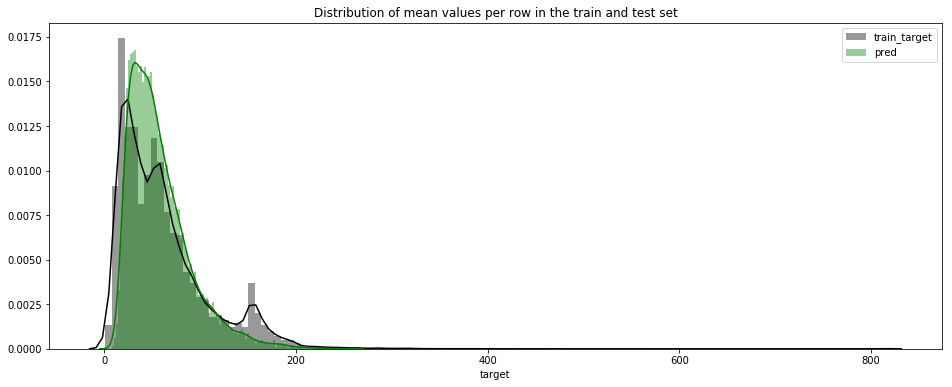

In [101]:
plt.figure(figsize = (16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train['target'], color = "black", kde = True, bins = 120, label ='train_target')
sns.distplot(pred,color = "green", kde = True, bins = 120, label = 'pred')
plt.legend()
plt.show()

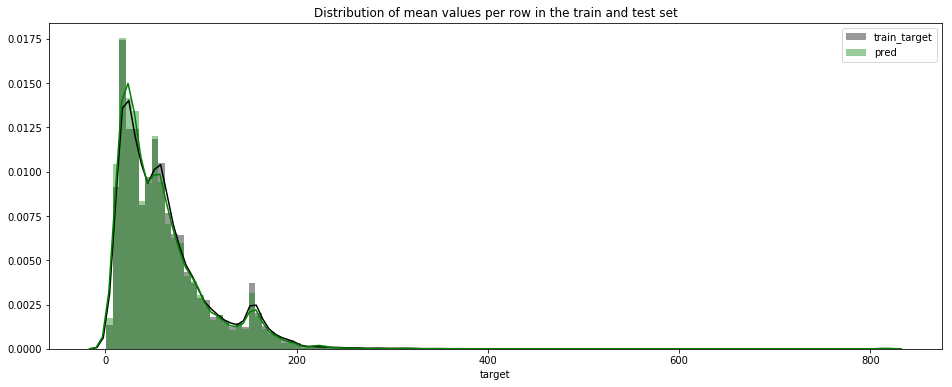

In [130]:
plt.figure(figsize = (16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train['target'], color = "black", kde = True, bins = 120, label ='train_target')
sns.distplot(pred_lr,color = "green", kde = True, bins = 120, label = 'pred')
plt.legend()
plt.show()

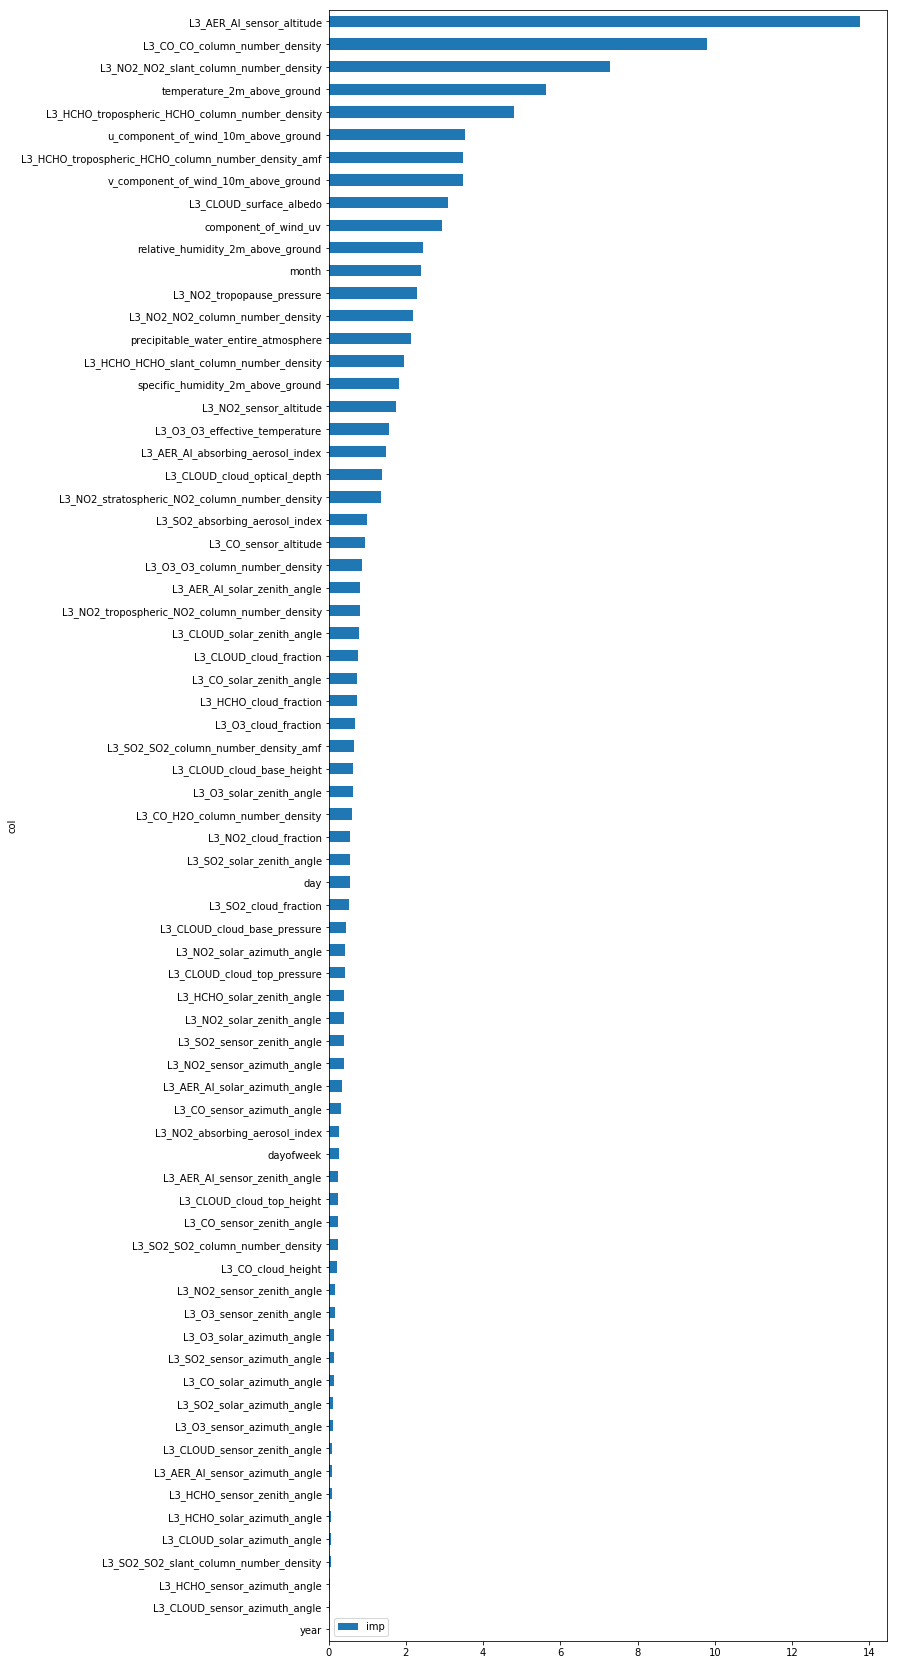

In [27]:
## Check for the feature importance 
fea_imp = pd.DataFrame({'imp':cat.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-110:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 30))
plt.savefig('catboost_feature_importance.png')
plt.show()